In [ ]:
!pip install matplotlib

In [8]:
#import matplotlib as plt
import matplotlib.pyplot as plt

In [9]:
import pandas as pd
import numpy as np
import warnings
# Suppressing warnings
warnings.filterwarnings('ignore')

In [12]:
# Generating sample data
np.random.seed(0)

# Date ranges
dates = pd.date_range(start='2022-01-01', end='2022-12-31', periods=1000)

# Regions, States, and Cities
regions = np.random.choice(['North', 'South', 'East', 'West'], size=1000)
states = np.random.choice(['StateA', 'StateB', 'StateC', 'StateD'], size=1000)
cities = np.random.choice(['CityX', 'CityY', 'CityZ'], size=1000)

# Products and Categories
products = np.random.choice(['ProductA', 'ProductB', 'ProductC'], size=1000)
categories = np.random.choice(['Category1', 'Category2', 'Category3'], size=1000)

# Segment, Ship Mode, Shipping Type
segments = np.random.choice(['Consumer', 'Corporate', 'Home Office'], size=1000)
ship_modes = np.random.choice(['Standard Class', 'Second Class', 'First Class'], size=1000)
shipping_types = np.random.choice(['Express', 'Regular', 'Overnight'], size=1000)

# Numeric columns
quantity = np.random.randint(1, 10, size=1000)
profit = np.random.uniform(-100, 100, size=1000).round(2)
sales = np.random.uniform(100, 1000, size=1000).round(2)
discount = np.random.uniform(0, 0.5, size=1000).round(2)
shipping_cost = np.random.uniform(5, 50, size=1000).round(2)
customer_income = np.random.randint(20000, 150000, size=1000)
customer_id = np.random.randint(1000, 5000, size=1000)

In [13]:
# Creating the DataFrame
data = {
    'order_date': dates,
    'ship_date': dates + pd.to_timedelta(np.random.randint(1, 10, size=1000), unit='D'),
    'quantity': quantity,
    'profit': profit,
    'sales': sales,
    'region': regions,
    'state': states,
    'city': cities,
    'product': products,
    'product_category': categories,
    'segment': segments,
    'discount': discount,
    'ship_mode': ship_modes,
    'shipping_cost': shipping_cost,
    'shipping_type': shipping_types,
    'customer_income': customer_income,
    'customer_id': customer_id
}

df = pd.DataFrame(data)

# Displaying the first few rows of the generated dataset
df.head()

,order_date,ship_date,quantity,profit,sales,region,state,city,product,product_category,segment,discount,ship_mode,shipping_cost,shipping_type,customer_income,customer_id
0,2022-01-01 00:00:00.000000000,2022-01-07 00:00:00.000000000,4,6.79,914.96,North,StateD,CityY,ProductC,Category1,Home Office,0.01,Second Class,24.82,Overnight,135906,1805
1,2022-01-01 08:44:41.081081081,2022-01-08 08:44:41.081081081,7,74.15,714.20,West,StateC,CityY,ProductB,Category3,Consumer,0.42,Second Class,21.95,Overnight,90414,3057
2,2022-01-01 17:29:22.162162162,2022-01-06 17:29:22.162162162,2,-56.39,955.07,South,StateD,CityZ,ProductB,Category2,Corporate,0.08,First Class,39.62,Express,43269,1289
3,2022-01-02 02:14:03.243243243,2022-01-08 02:14:03.243243243,7,93.39,502.86,North,StateA,CityX,ProductB,Category1,Home Office,0.28,First Class,24.77,Regular,119636,1604
4,2022-01-02 10:58:44.324324324,2022-01-10 10:58:44.324324324,2,-84.06,692.63,West,StateA,CityZ,ProductB,Category3,Corporate,0.47,Standard Class,16.20,Regular,87008,3529


In [16]:
df.dtypes

order_date          datetime64[ns]
ship_date           datetime64[ns]
quantity                     int32
profit                     float64
sales                      float64
region                      object
state                       object
city                        object
product                     object
product_category            object
segment                     object
discount                   float64
ship_mode                   object
shipping_cost              float64
shipping_type               object
customer_income              int32
customer_id                  int32
dtype: object

In [15]:
df.columns

Index(['order_date', 'ship_date', 'quantity', 'profit', 'sales', 'region',
       'state', 'city', 'product', 'product_category', 'segment', 'discount',
       'ship_mode', 'shipping_cost', 'shipping_type', 'customer_income',
       'customer_id'],
      dtype='object')

### 1: Total Sales by Month

In [17]:
# Group by month and calculate total sales
monthly_sales = df.resample('M', on='order_date')['sales'].sum()
monthly_sales

order_date
2022-01-31    44454.66
2022-02-28    40126.26
2022-03-31    45084.41
2022-04-30    47231.22
2022-05-31    47801.85
2022-06-30    49756.15
2022-07-31    47296.81
2022-08-31    46025.05
2022-09-30    43768.12
2022-10-31    42629.16
2022-11-30    44818.56
2022-12-31    43497.62
Freq: M, Name: sales, dtype: float64

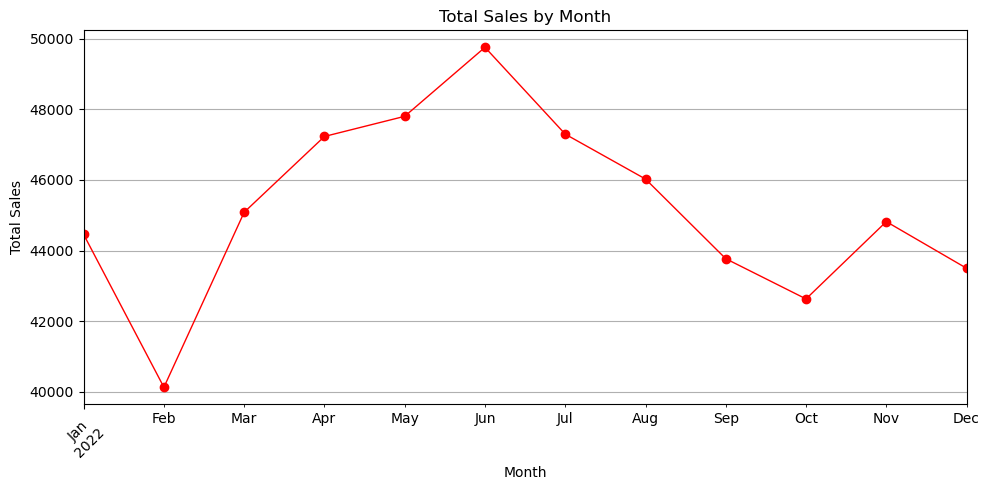

In [24]:
# Plotting
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color='red', linestyle='-', linewidth=1)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.Profit Distribution by Product Category

In [25]:
# Group by product category and calculate total profit
profit_by_category = df.groupby('product_category')['profit'].sum()

In [26]:
profit_by_category

product_category
Category1     270.96
Category2     354.14
Category3   -2417.38
Name: profit, dtype: float64

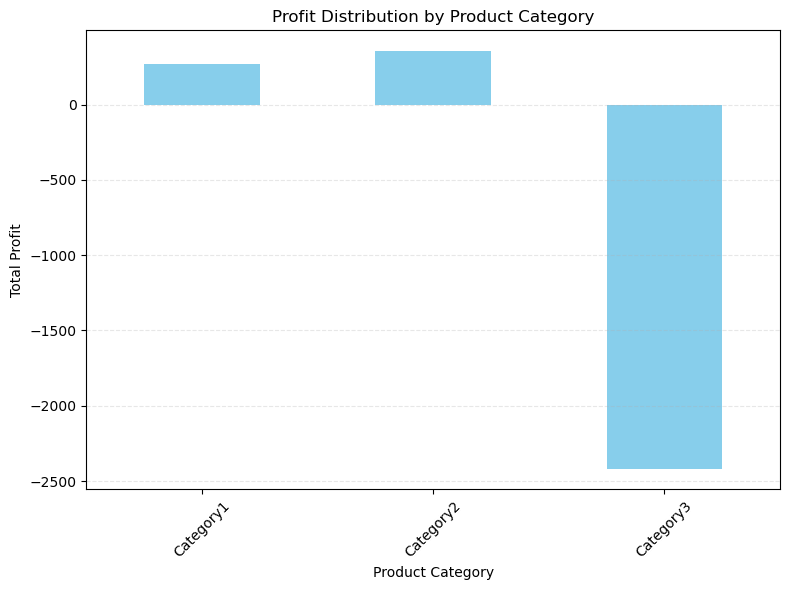

In [30]:
# Plotting
plt.figure(figsize=(8, 6))
profit_by_category.plot(kind='bar', color='skyblue')
plt.title('Profit Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3: Shipping Mode Analysis

In [31]:
# Counting orders by ship mode
ship_mode_counts = df['ship_mode'].value_counts()
ship_mode_counts

ship_mode
Second Class      368
Standard Class    339
First Class       293
Name: count, dtype: int64

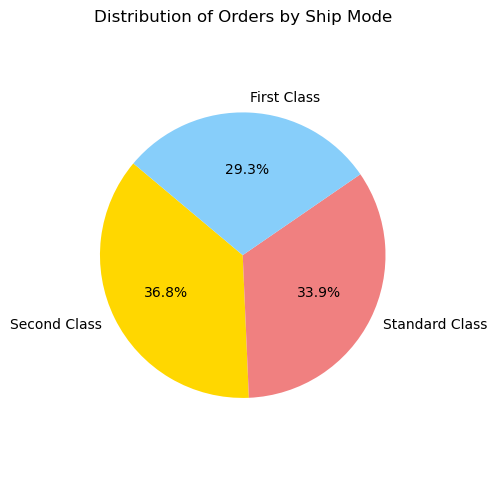

In [34]:
# Plotting as a pie chart
plt.figure(figsize=(5, 5))
plt.pie(ship_mode_counts,labels=ship_mode_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Orders by Ship Mode')
plt.axis('equal')
plt.tight_layout()
plt.show()

### 4: Customer Income Distribution

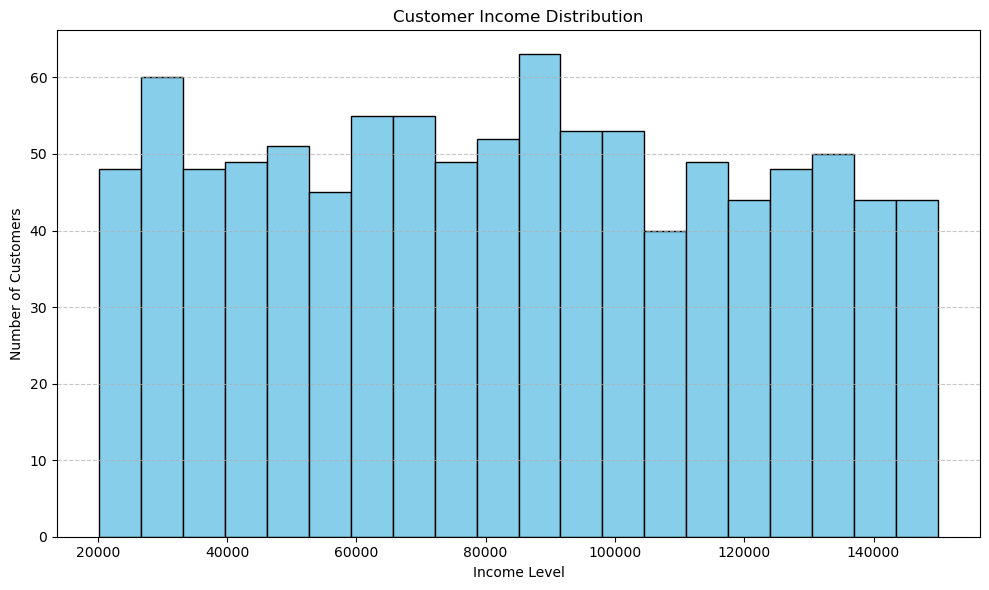

In [38]:
# Plotting customer income distribution
plt.figure(figsize=(10, 6))
plt.hist(df['customer_income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Customer Income Distribution')
plt.xlabel('Income Level')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
df.columns

Index(['order_date', 'ship_date', 'quantity', 'profit', 'sales', 'region',
       'state', 'city', 'product', 'product_category', 'segment', 'discount',
       'ship_mode', 'shipping_cost', 'shipping_type', 'customer_income',
       'customer_id'],
      dtype='object')

### 5: Relationship between Discount and Profit

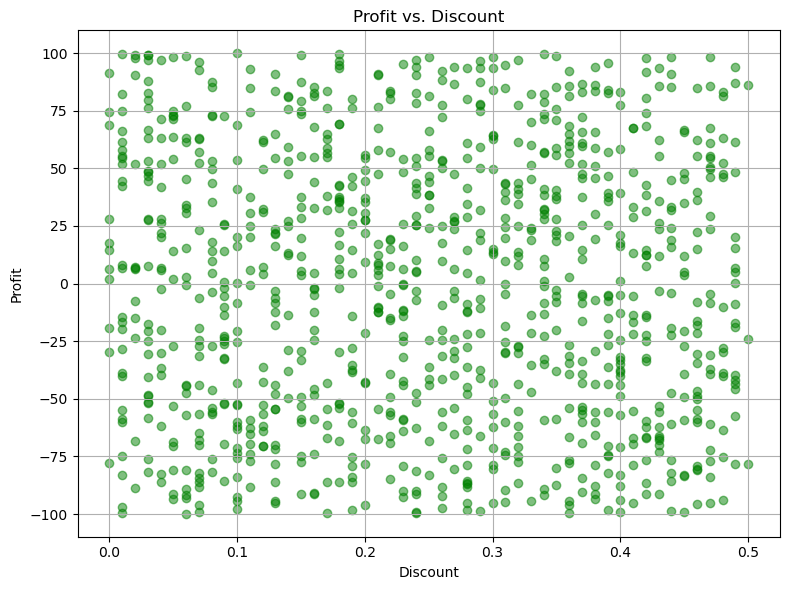

In [39]:
# Plotting discount vs. profit
plt.figure(figsize=(8, 6))
plt.scatter(df['discount'], df['profit'], color='green', alpha=0.5)
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

### 6: Regional Sales Analysis

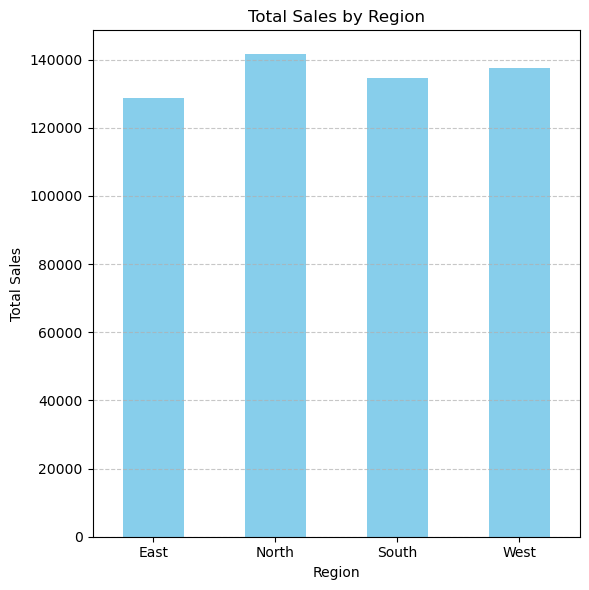

In [40]:
# Group by region and calculate total sales
sales_by_region = df.groupby('region')['sales'].sum()

# Plotting regional sales
plt.figure(figsize=(6, 6))
sales_by_region.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

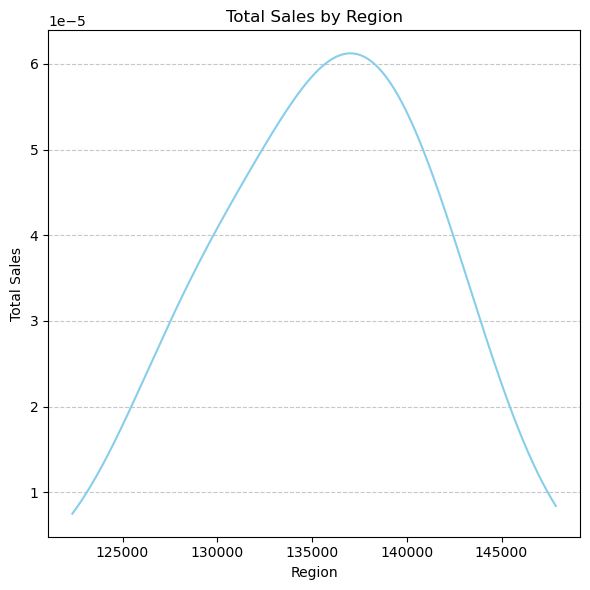

In [42]:
# Plotting regional sales
plt.figure(figsize=(6, 6))
sales_by_region.plot(kind='kde', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 7: Box Plot of Shipping Cost by Shipping Type2

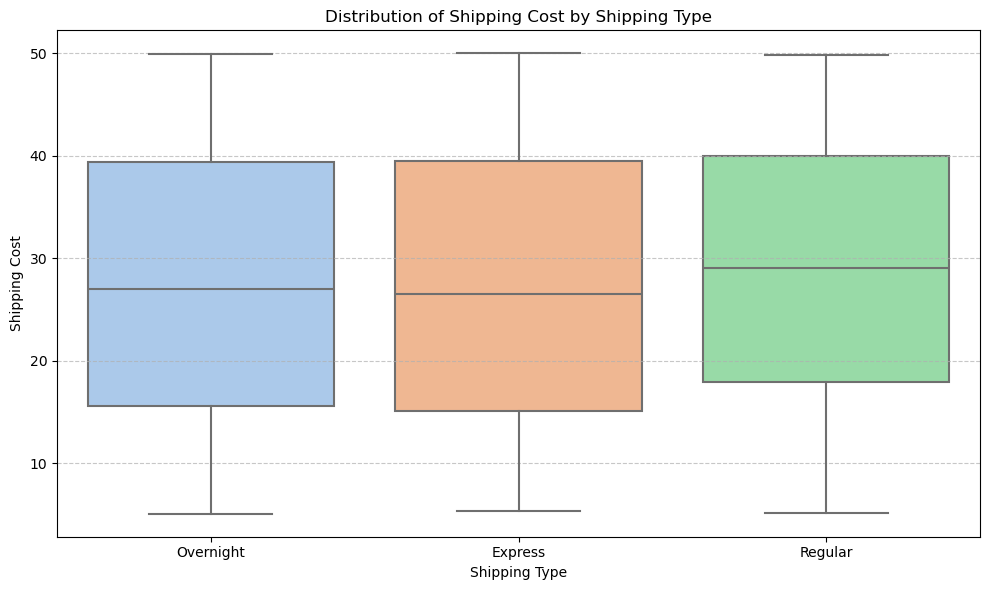

In [43]:
import seaborn as sns

# Plotting box plot of shipping cost by shipping type
plt.figure(figsize=(10, 6))
sns.boxplot(x='shipping_type', y='shipping_cost', data=df, palette='pastel')
plt.title('Distribution of Shipping Cost by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Shipping Cost')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 10: Boxen Plot of Sales by Segment

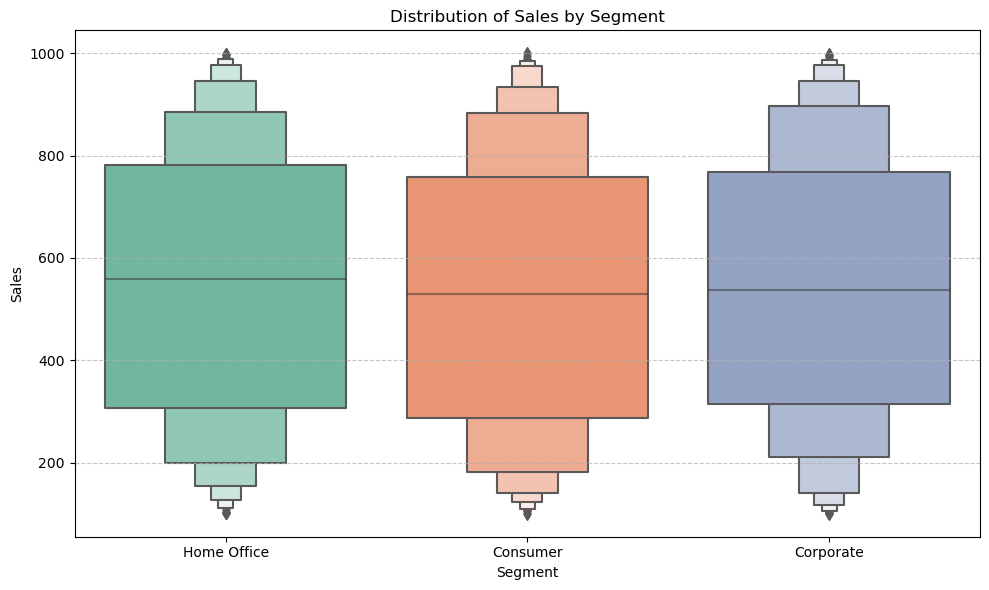

In [44]:
# Plotting boxen plot of sales by segment
plt.figure(figsize=(10, 6))
sns.boxenplot(x='segment', y='sales', data=df, palette='Set2')
plt.title('Distribution of Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 11: Violin Plot of Profit by Region

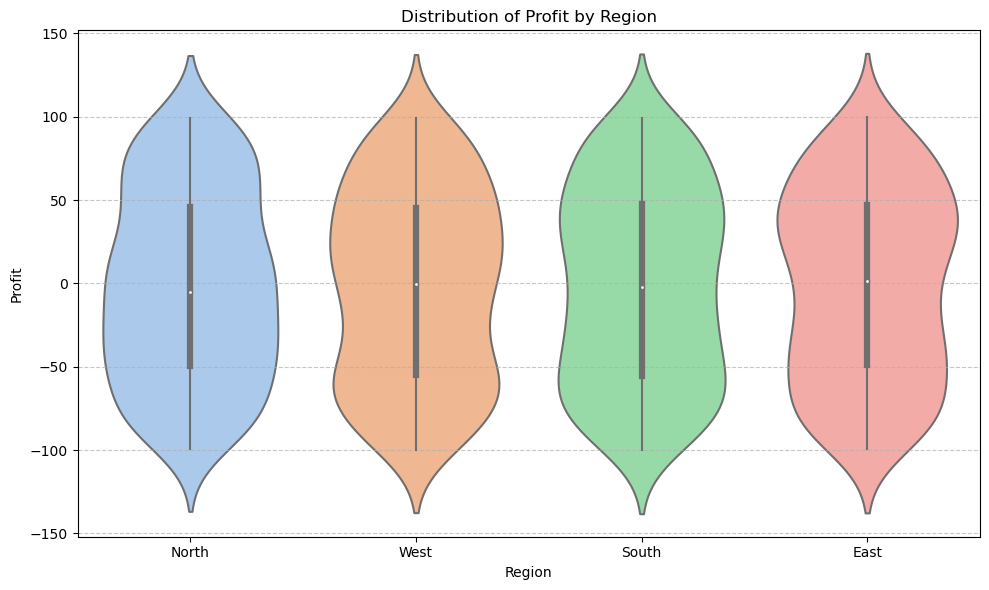

In [45]:
# Plotting violin plot of profit by region
plt.figure(figsize=(10, 6))
sns.violinplot(x='region', y='profit', data=df, palette='pastel')
plt.title('Distribution of Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 12: Heatmap of Correlation Matrix

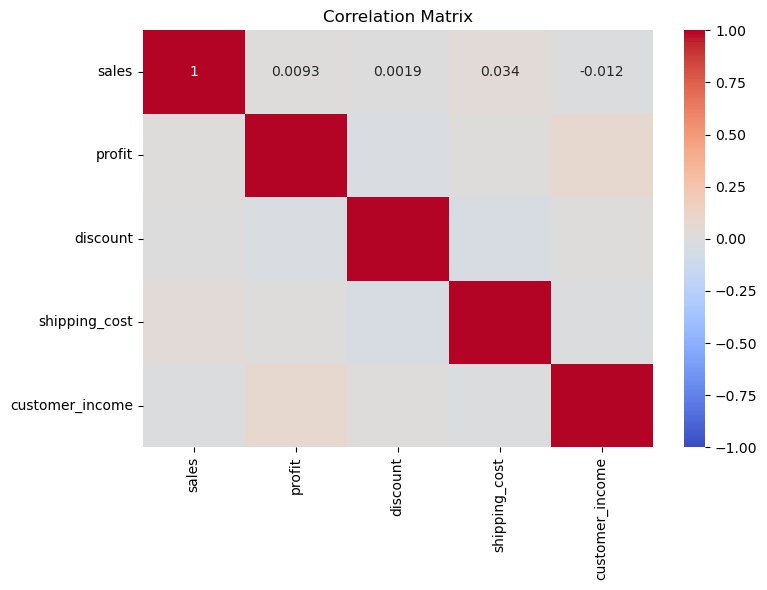

In [46]:
# Selecting numeric columns for correlation matrix
numeric_cols = ['sales', 'profit', 'discount', 'shipping_cost', 'customer_income']

# Calculating correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plotting heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Boxen Plot of Sales by Region and Segment

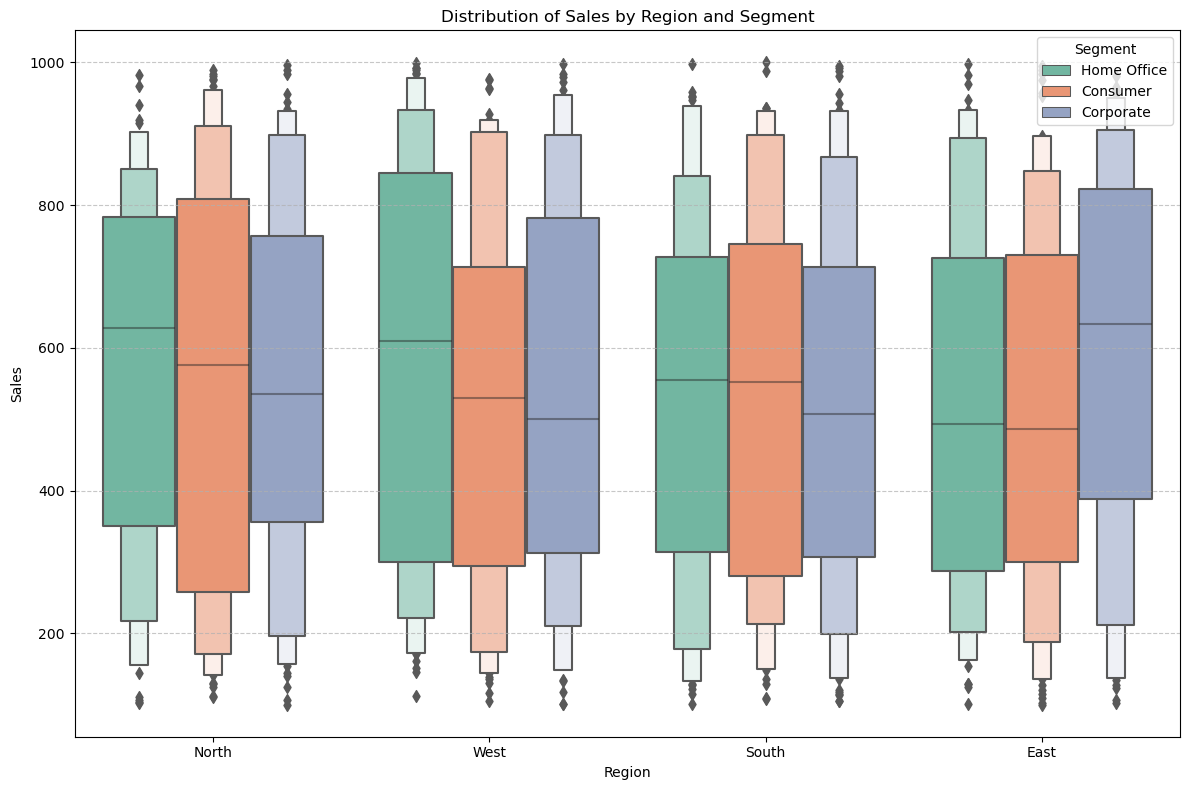

In [47]:
# Plotting boxen plot of sales by region and segment
plt.figure(figsize=(12, 8))
sns.boxenplot(x='region', y='sales', hue='segment', data=df, palette='Set2')
plt.title('Distribution of Sales by Region and Segment')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Segment', loc='upper right')
plt.tight_layout()
plt.show()

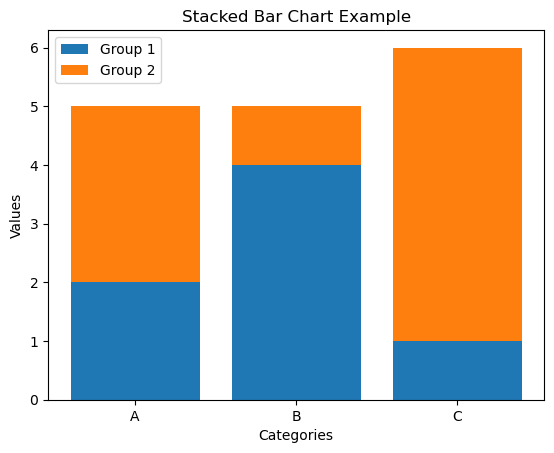

In [48]:

# Categories and their values for multiple groups
categories = ['A', 'B', 'C']
values1 = [2, 4, 1]
values2 = [3, 1, 5]

# Create the stacked bar chart
plt.bar(categories, values1, label='Group 1')
plt.bar(categories, values2, bottom=values1, label='Group 2')

# Add labels, title, and legend
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Stacked Bar Chart Example")
plt.legend()

# Display the plot
plt.show()

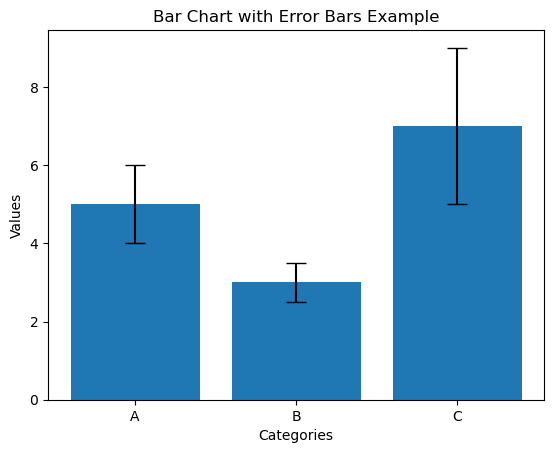

In [49]:
# Category labels and their values with errors
categories = ['A', 'B', 'C']
values = [5, 3, 7]
errors = [1, 0.5, 2]

# Create the bar chart with error bars
plt.bar(categories, values, yerr=errors, capsize=7)  # 'capsize' controls error bar size

# Add labels and title
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Chart with Error Bars Example")

# Display the plot
plt.show()

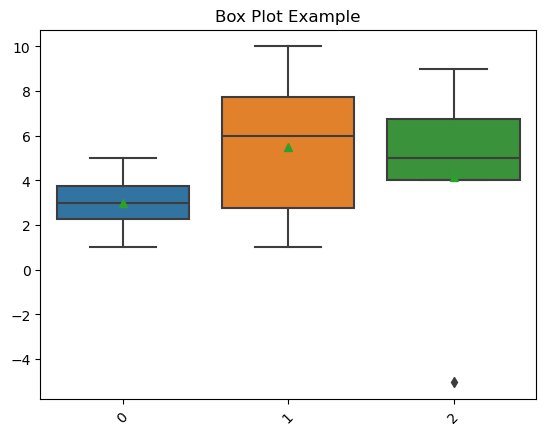

In [56]:
# Sample data with outliers
data = [
    [1, 2, 3, 4, 5, 3],  # No outliers
    [2, 5, 7, 1, 8, 10],  # Outlier above upper whisker
    [4, 4, 9, 7, 6, -5.05]   # Outlier below lower whisker
]

# Convert data to a pandas DataFrame for seaborn
df = pd.DataFrame(data).T

# Create the box plot with labels
sns.boxplot(data=df, showmeans=True)  # 'howmeans=True' adds means as points

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)  # Rotate x-axis labels

# Add title
plt.title("Box Plot Example")

# Display the plot
plt.show()